In [ ]:
# acf - Auto Corelation Function
# pacf - Partial Auto Corelation Function

In [ ]:
# tsa = time series analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing     # SES
from statsmodels.tsa.holtwinters import Holt                   # DES
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [3]:
from pandas.plotting import lag_plot 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
wallmart = pd.read_csv('footfalls.csv')
wallmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


### Line Plot to Understand the Pattern

<AxesSubplot:>

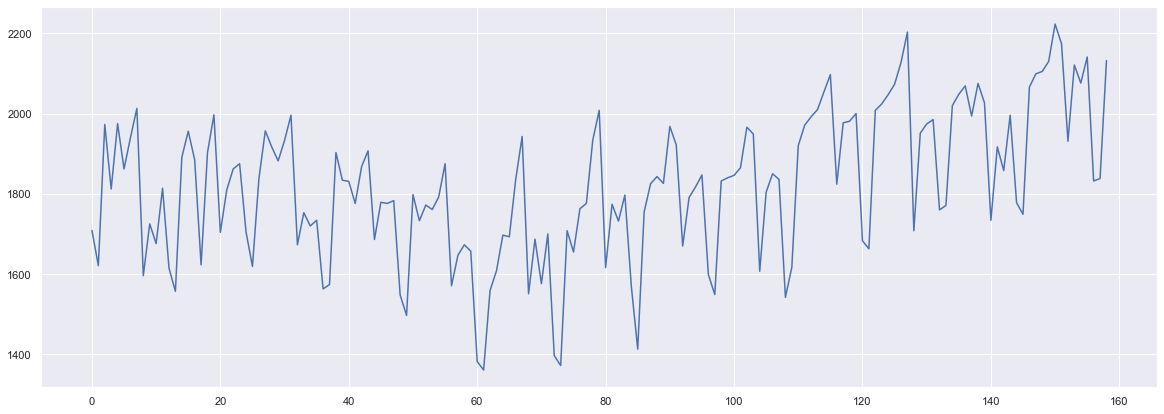

In [8]:
plt.figure(figsize=(20,7))
wallmart['Footfalls'].plot()

### Splitting the Data --- We cant choose Randomly as Sequence is very Imp

In [25]:
Train = wallmart.head(147)
Test  = wallmart.tail(12)

# only y no x 

## Decomposition of Time Series

In [ ]:
# since there is lot of variation we can not clearly see the pattern

# so we decompose this time series plot so we get 3 components of Time Series

1. Trend           = Long Term
2. Seasonality     = Pattern
3. Noise           = Randomness

# but 1st we take window size of Moving Average = period 

### Moving Average

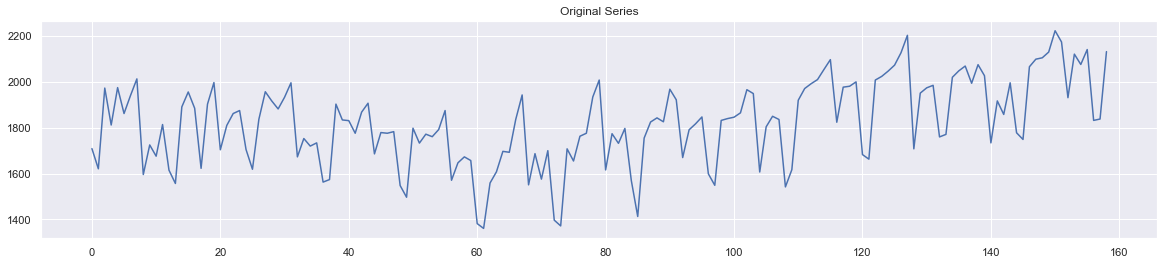

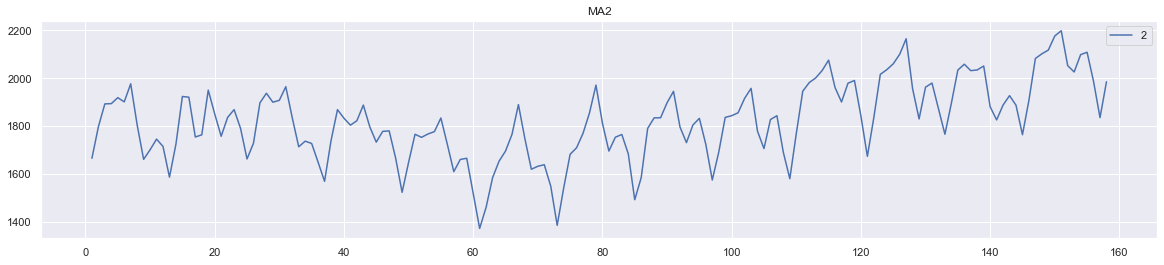

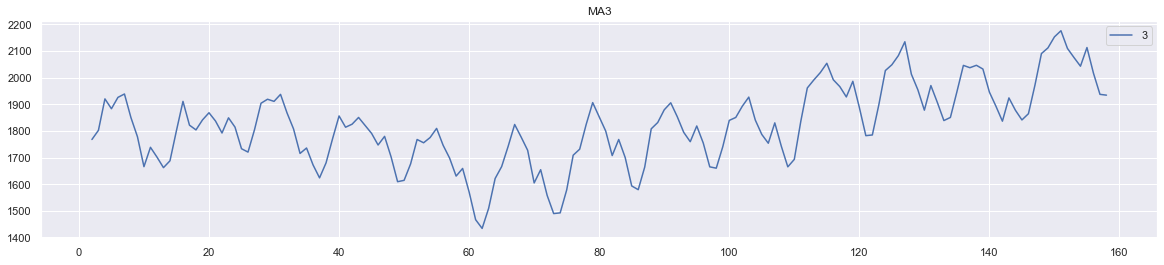

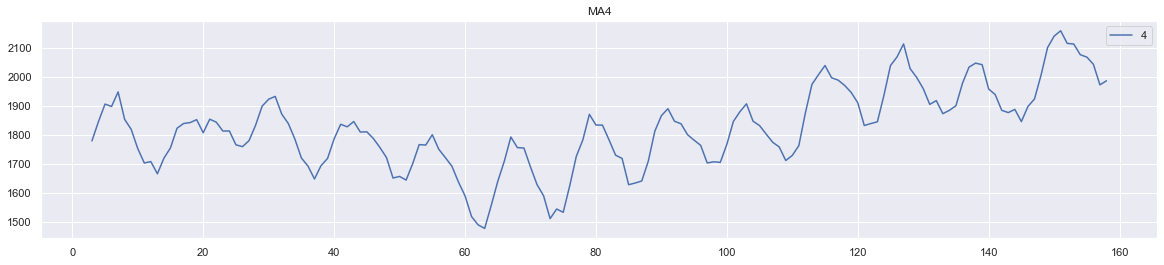

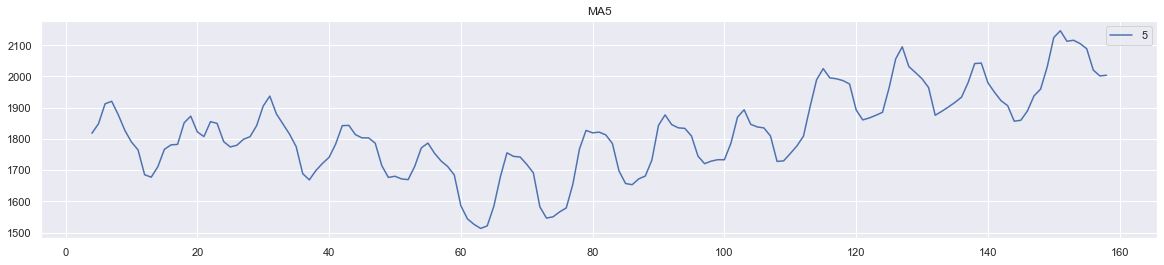

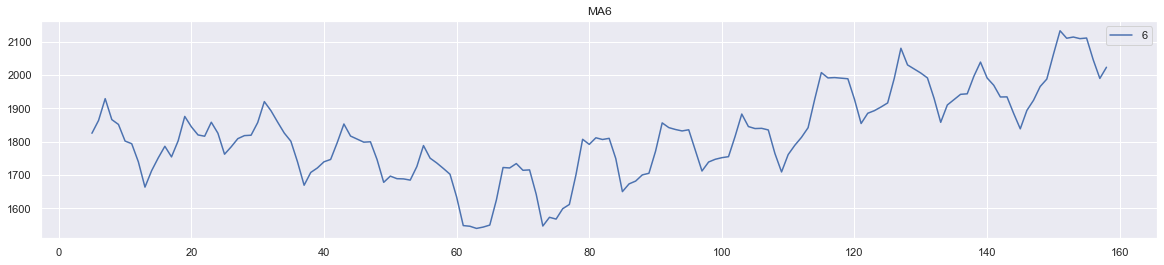

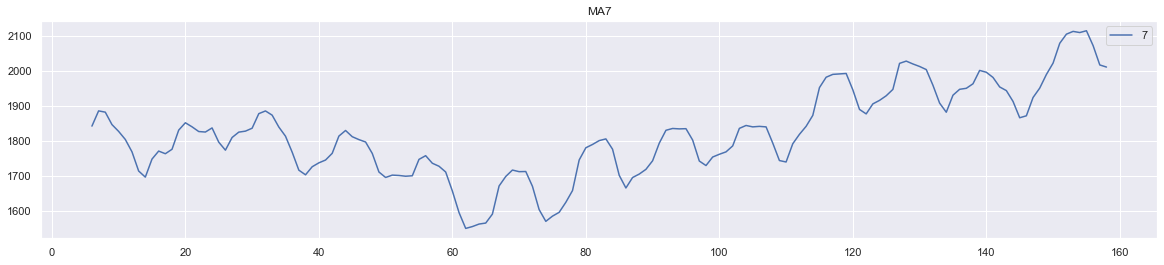

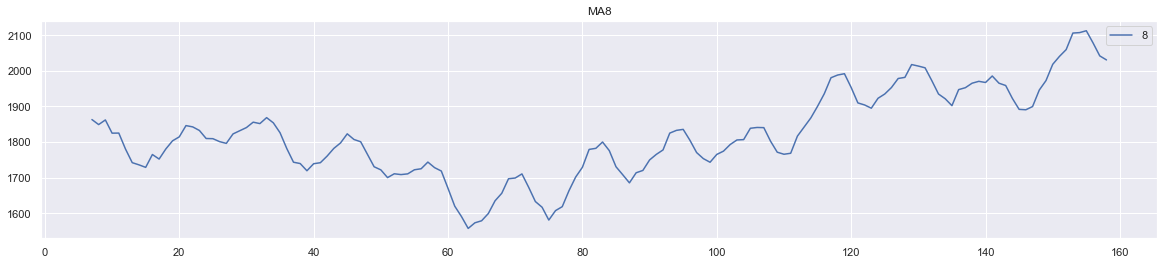

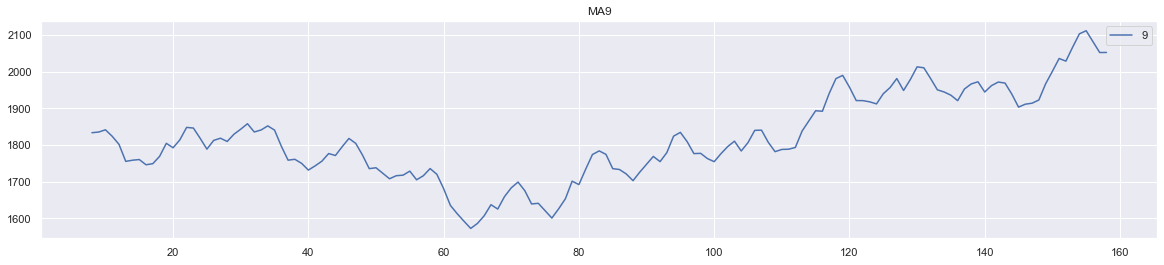

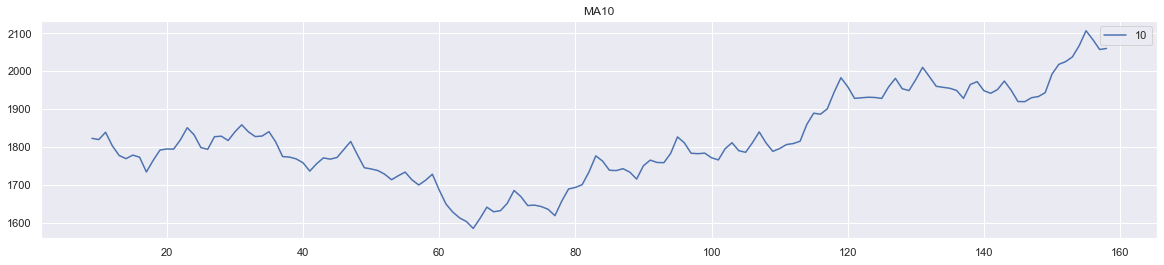

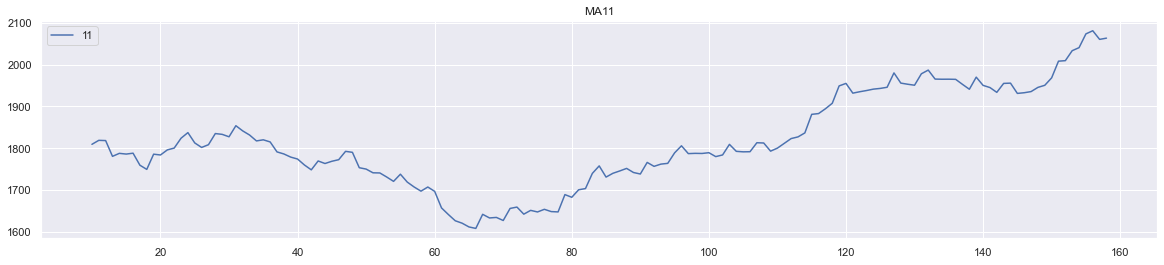

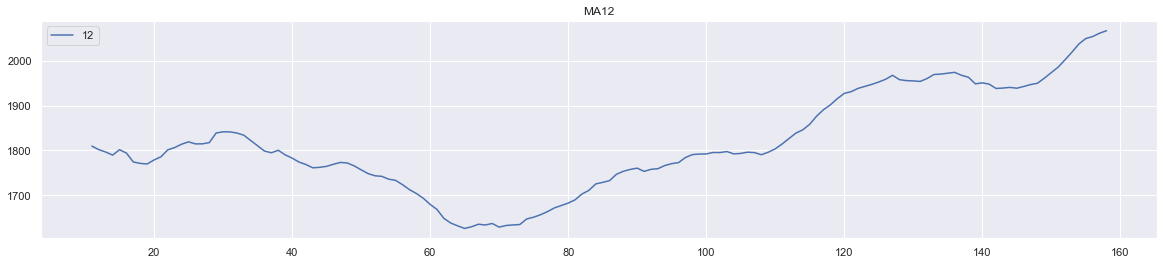

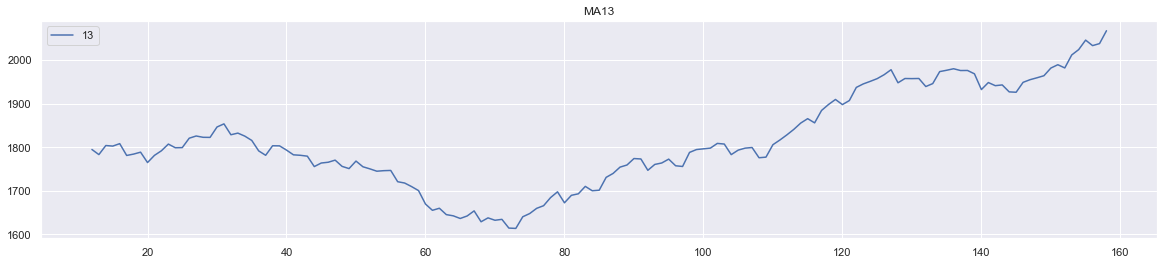

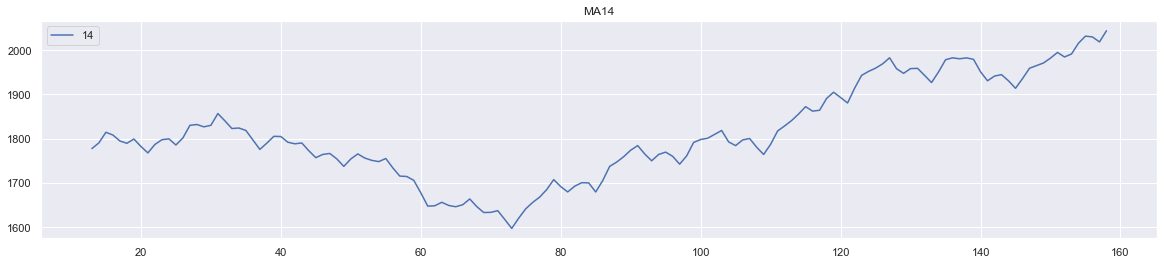

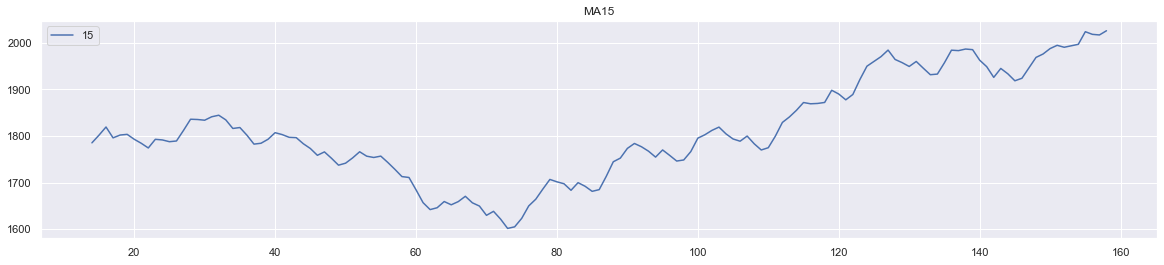

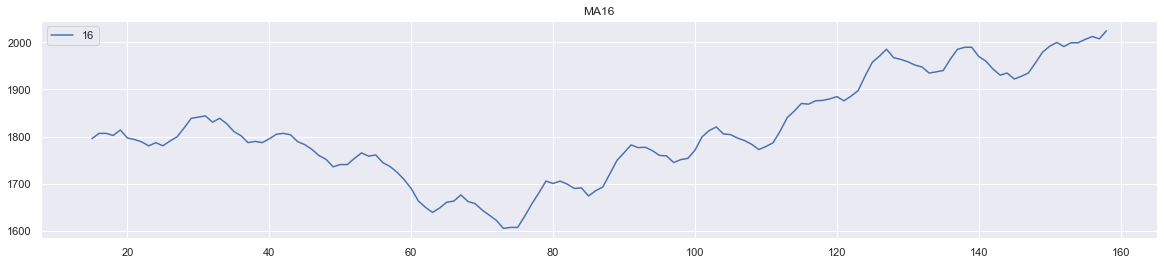

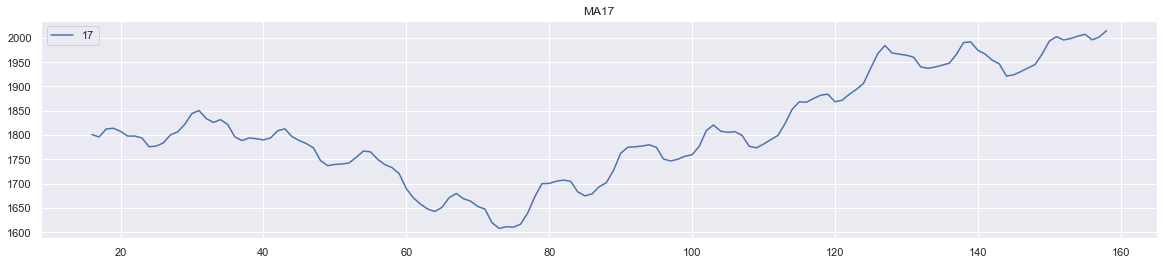

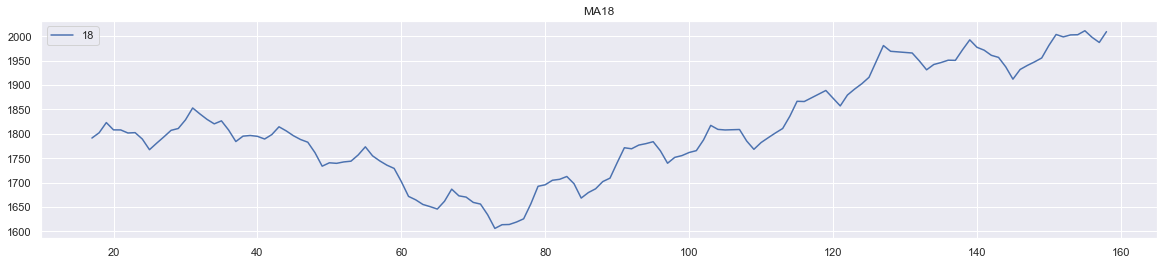

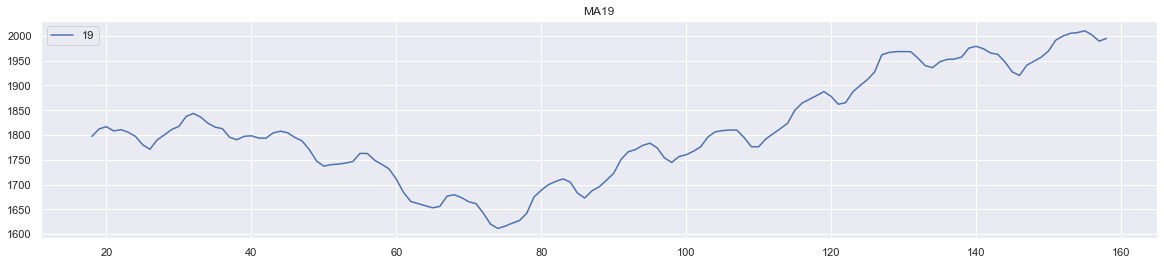

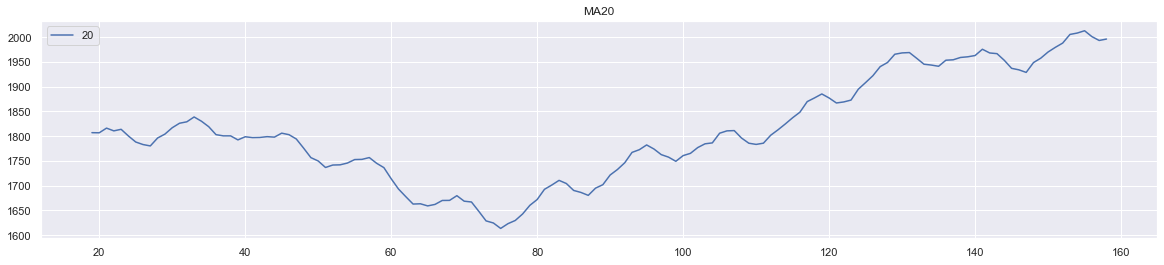

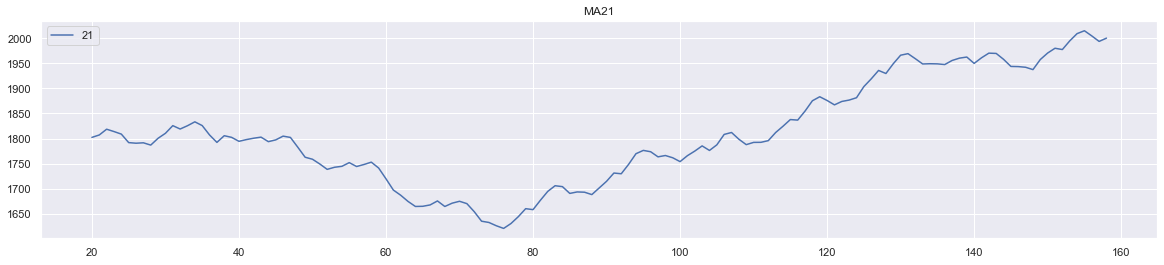

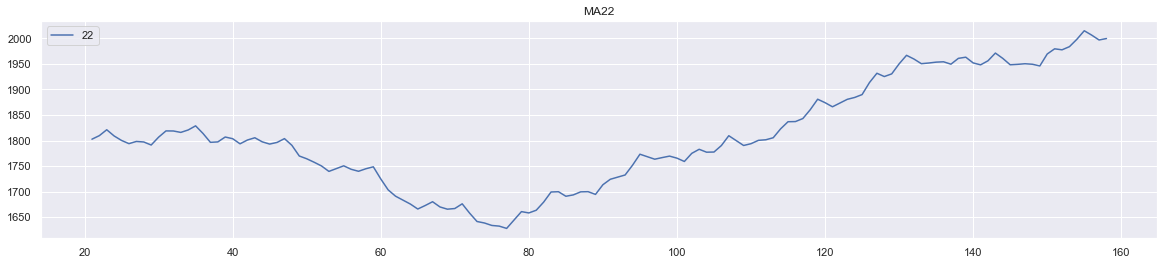

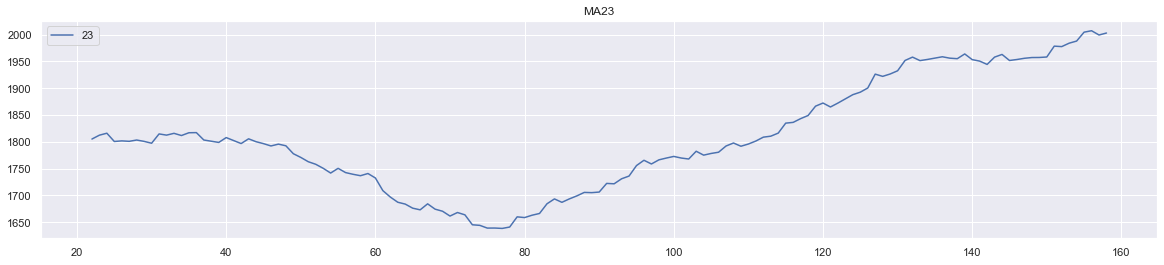

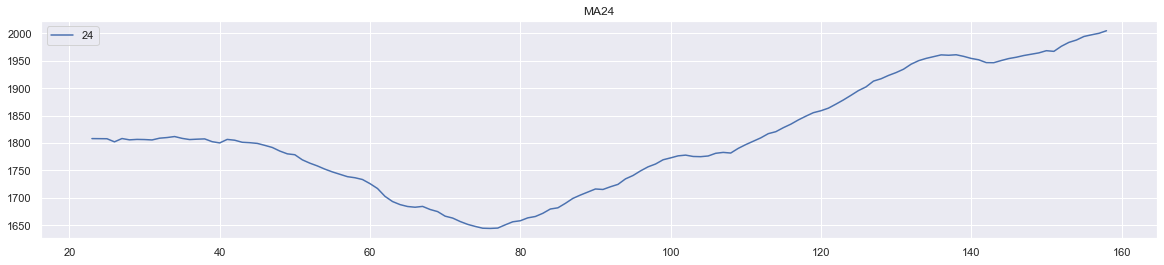

In [10]:
plt.figure(figsize=(20,4))

wallmart['Footfalls'].plot(label = 'Original')

plt.title('Original Series')

for i in range(2,25):  # since we know it is yearly data we take period in multiply of 12
    plt.figure(figsize=(20,4))
    
    wallmart['Footfalls'].rolling(i).mean().plot(label = str(i))
    
    plt.title('MA'+str(i))
    plt.legend(loc = 'best')
    plt.show()

In [ ]:
# we can see for MA 12 & 24 we get very less variation and w ecan easily predict for future
# so period is 12 / 24 / 36 / 48 ---

### Decomposition

<Figure size 1440x504 with 0 Axes>

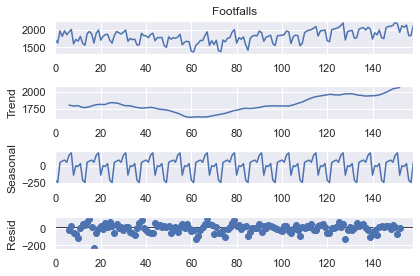

In [17]:
decompose_ts_add = seasonal_decompose(wallmart['Footfalls'],period=12, model = 'additive')
# plt.figure(figsize=(20,7))
decompose_ts_add.plot()
plt.show()

## Auto Corelation & Partial Auto Corelation

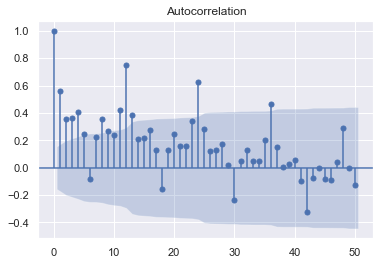

In [22]:
plot_acf(wallmart['Footfalls'], lags=50)

plt.show()

In [ ]:
# this is because intercorelation between middle elements

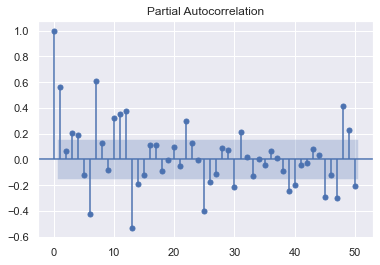

In [23]:
plot_pacf(wallmart['Footfalls'], lags= 50)
plt.show()

In [ ]:
# Throwing out effect of middle element - checking one to one corelation 

# we can go till lag 1 - we have to stop when 1st lag enters in that shaded part for 1st time

## Evaluation Metric MAPE

* **MAPE - Mean Absolute Percentage Error** - it tells relative error / scales the relative error
* **MSE - Mean Squared Error** - no relative reference - does not give better idea about one other

In [24]:
def MAPE(pred, org):
    footfall = np.abs((pred-org)/org)*100
    return np.mean(footfall)

## Model Building

### Simple Exponential Method

In [26]:
ses_model = SimpleExpSmoothing(endog = Train['Footfalls']).fit(smoothing_level = 0.2)

In [27]:
ses_pred = ses_model.predict(start = Test.index[0], end = Test.index[-1])

ses_pred

147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

In [ ]:
# all the predictions are same as in SES there is no trend parameter only local average so it is same for all

#### Evaluation by MAPE

In [29]:
MAPE(ses_pred,Test['Footfalls'])

8.490637057828362

In [ ]:
# 8.49 % Variations in predictions

In [30]:
# visualize 

df = pd.DataFrame()

df['Actual_Footfall']    = Test['Footfalls']
df['Predicted_Footfall'] = list(ses_pred)
df

,Actual_Footfall,Predicted_Footfall
147,2099,1913.677017
148,2105,1913.677017
149,2130,1913.677017
150,2223,1913.677017
151,2174,1913.677017
152,1931,1913.677017
153,2121,1913.677017
154,2076,1913.677017
155,2141,1913.677017
156,1832,1913.677017


In [ ]:
# we have not considered trend only local average but after 1st iterations local avg remains same

### Double Exponential Smoothing / Holts Method

In [32]:
holt_model = Holt(endog=Train['Footfalls']).fit(smoothing_level= 0.8,smoothing_trend = 0.2)

In [33]:
holt_pred = holt_model.predict(start = Test.index[0], end = Test.index[-1])

In [34]:
holt_df = pd.DataFrame()

holt_df['Original_Footfall']  = Test['Footfalls']
holt_df['Predicted_Footfall'] = list(holt_pred)

holt_df

,Original_Footfall,Predicted_Footfall
147,2099,2021.566977
148,2105,2044.942083
149,2130,2068.317189
150,2223,2091.692296
151,2174,2115.067402
152,1931,2138.442509
153,2121,2161.817615
154,2076,2185.192721
155,2141,2208.567828
156,1832,2231.942934


In [ ]:
# since we have trend each prediction if different but inc or dec depends on Trend -- here inc even some time actual is low
# not considering seasonality

#### Evaluation by MAPE

In [35]:
MAPE(holt_pred,Test['Footfalls'])

7.546249229496066

In [ ]:
# 7.546 % Variations in predictions

### Holt's - Winter Model

* **Seasonality** can be additive & Multiplicative 

* **trend & Seasonal**  : {"add", "mul", "additive", "multiplicative", None}

#### Additive 

In [37]:
winter_add =  ExponentialSmoothing(endog=Train['Footfalls'], trend='add' ,seasonal='add', seasonal_periods=12).fit()

In [38]:
winter_add_pred = winter_add.predict(start = Test.index[0], end = Test.index[-1])

In [39]:
winter_df = pd.DataFrame()

winter_df['Original_Footfall']  = Test['Footfalls']
winter_df['Predicted_Footfall'] = list(winter_add_pred)

winter_df

,Original_Footfall,Predicted_Footfall
147,2099,2043.268067
148,2105,2064.792849
149,2130,2044.979928
150,2223,2134.391437
151,2174,2155.325605
152,1931,1831.503991
153,2121,2035.597456
154,2076,2025.827099
155,2141,2100.485062
156,1832,1842.201272


In [ ]:
# here not all pred is in inc order -- seasonality taken into consideration

##### Evaluation by MAPE

In [40]:
MAPE(winter_add_pred,Test['Footfalls'])

2.679162324636184

In [ ]:
# 2.67 % Variations in predictions

#### Multiplicative 

In [41]:
winter_mul =  ExponentialSmoothing(endog=Train['Footfalls'], trend='add' ,seasonal='mul', seasonal_periods=12).fit()

In [44]:
winter_mul_pred = winter_mul.predict(start = Test.index[0], end = Test.index[-1])

##### Evaluation by MAPE

In [45]:
MAPE(winter_mul_pred,Test['Footfalls'])

3.8735070776339757

In [ ]:
# 3.87 % Variations in predictions

## Final Model by combining train and test

In [ ]:
# we have got least MAPE add additive Winter so we select that model

In [46]:
winter_model_add = ExponentialSmoothing(wallmart['Footfalls'], trend='add',seasonal='add',seasonal_periods=12).fit()

In [48]:
winter_model_add.forecast(10) #next 10

159    2150.541532
160    2166.778591
161    2164.175709
162    2248.478847
163    2247.445418
164    1951.567735
165    2136.155477
166    2108.689135
167    2167.622472
168    1890.727823
dtype: float64

## Prediction 

In [49]:
winter_add_pred_new = winter_add.predict(start = Test.index[0], end = 190) # till 190th observation we want prediction

winter_add_pred_new

147    2043.268067
148    2064.792849
149    2044.979928
150    2134.391437
151    2155.325605
152    1831.503991
153    2035.597456
154    2025.827099
155    2100.485062
156    1842.201272
157    1808.758906
158    2065.648202
159    2090.266935
160    2111.791717
161    2091.978796
162    2181.390306
163    2202.324473
164    1878.502859
165    2082.596324
166    2072.825968
167    2147.483930
168    1889.200140
169    1855.757774
170    2112.647070
171    2137.265803
172    2158.790586
173    2138.977664
174    2228.389174
175    2249.323342
176    1925.501727
177    2129.595192
178    2119.824836
179    2194.482799
180    1936.199008
181    1902.756642
182    2159.645938
183    2184.264672
184    2205.789454
185    2185.976532
186    2275.388042
187    2296.322210
188    1972.500595
189    2176.594061
190    2166.823704
dtype: float64